# **Video Classifier**

**By**: Pedro Ruiz

---

Este Notebook se centra en la implementación de un **clasificador** para categorizar los videos basándose en las características extraídas. 

Consta de:

1. **Importaciones**
2. **Carga y preparación de datos**
3. **Entrenamiento del modelo**
4. **Evaluación**
5. **Visualizzación**

## 1. Importaciones

In [2]:
import os
import configparser
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

## 2. Carga y preparación de datos

In [3]:
notebook_dir = os.getcwd()  # En notebooks, usamos el directorio actual
project_root = os.path.abspath(os.path.join(notebook_dir, '..'))

config = configparser.ConfigParser()
config_path = os.path.join(project_root, 'config', 'settings.conf')
config.read(config_path)

vectorized_data_path = os.path.join(project_root, config['data']['output_vector_path'])

df = pd.read_csv(vectorized_data_path)

# Separamos variables X e y
X = df.drop(columns=['category', 'video_name']).values
y = df['category'].values


# y separamos los conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Características cargadas: {X.shape[1]}")
print(f"Total de muestras: {X.shape[0]}")
print(f"Muestras de entrenamiento: {X_train.shape[0]}")
print(f"Muestras de prueba: {X_test.shape[0]}")

Características cargadas: 77
Total de muestras: 300
Muestras de entrenamiento: 240
Muestras de prueba: 60


## 3. Entrenamiento del modelo

In [7]:
# Entrenamos una regresion logistica sencilla
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## 4. Evaluación

In [8]:
# Realizamos las predicciones
y_pred = clf.predict(X_test)

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

Reporte de clasificación:
              precision    recall  f1-score   support

     cooking       1.00      1.00      1.00        22
     traffic       1.00      1.00      1.00        16
   videoclip       1.00      1.00      1.00        22

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Matriz de confusión:
[[22  0  0]
 [ 0 16  0]
 [ 0  0 22]]


## 5. Visualizaciones

### Matriz de Confusión

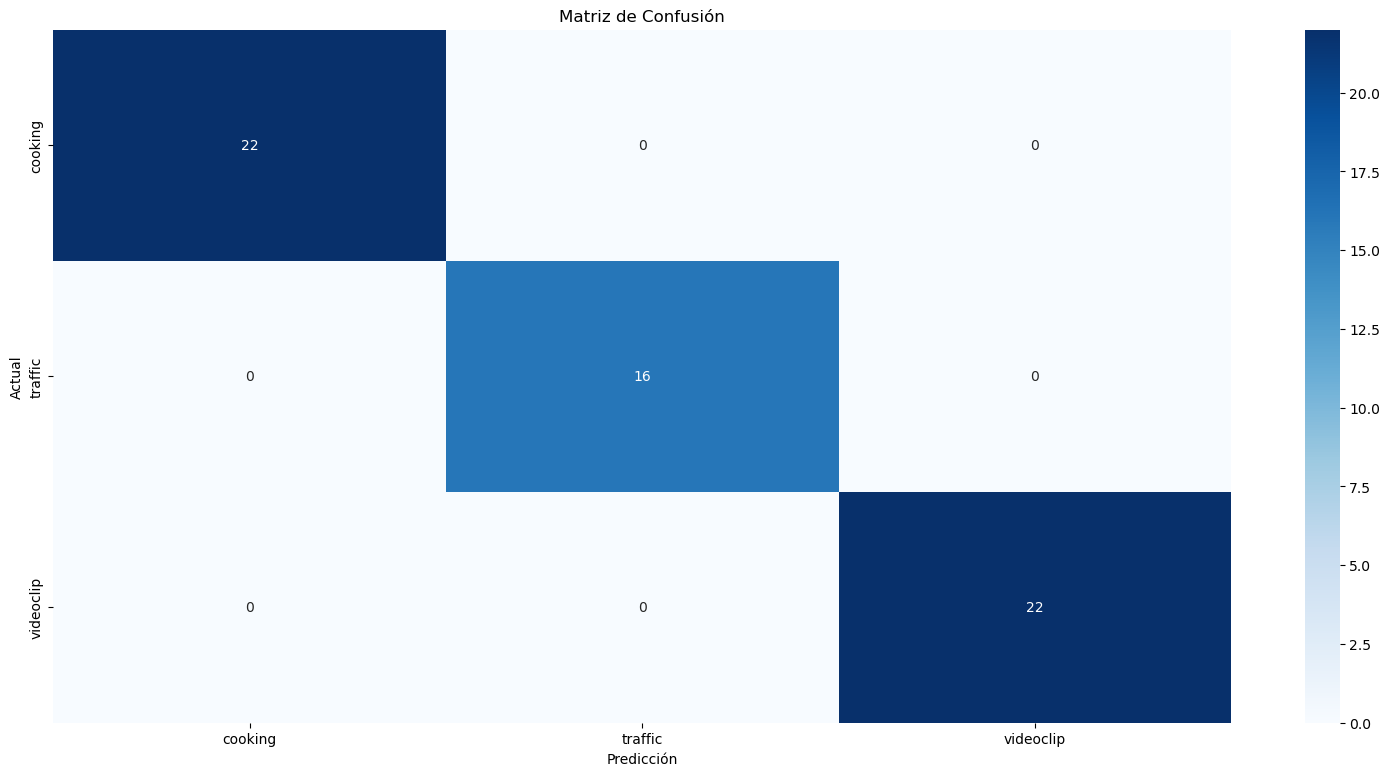

In [18]:
plt.figure(figsize=(19, 9))

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Actual")

plt.show()

### Importancia de las Características

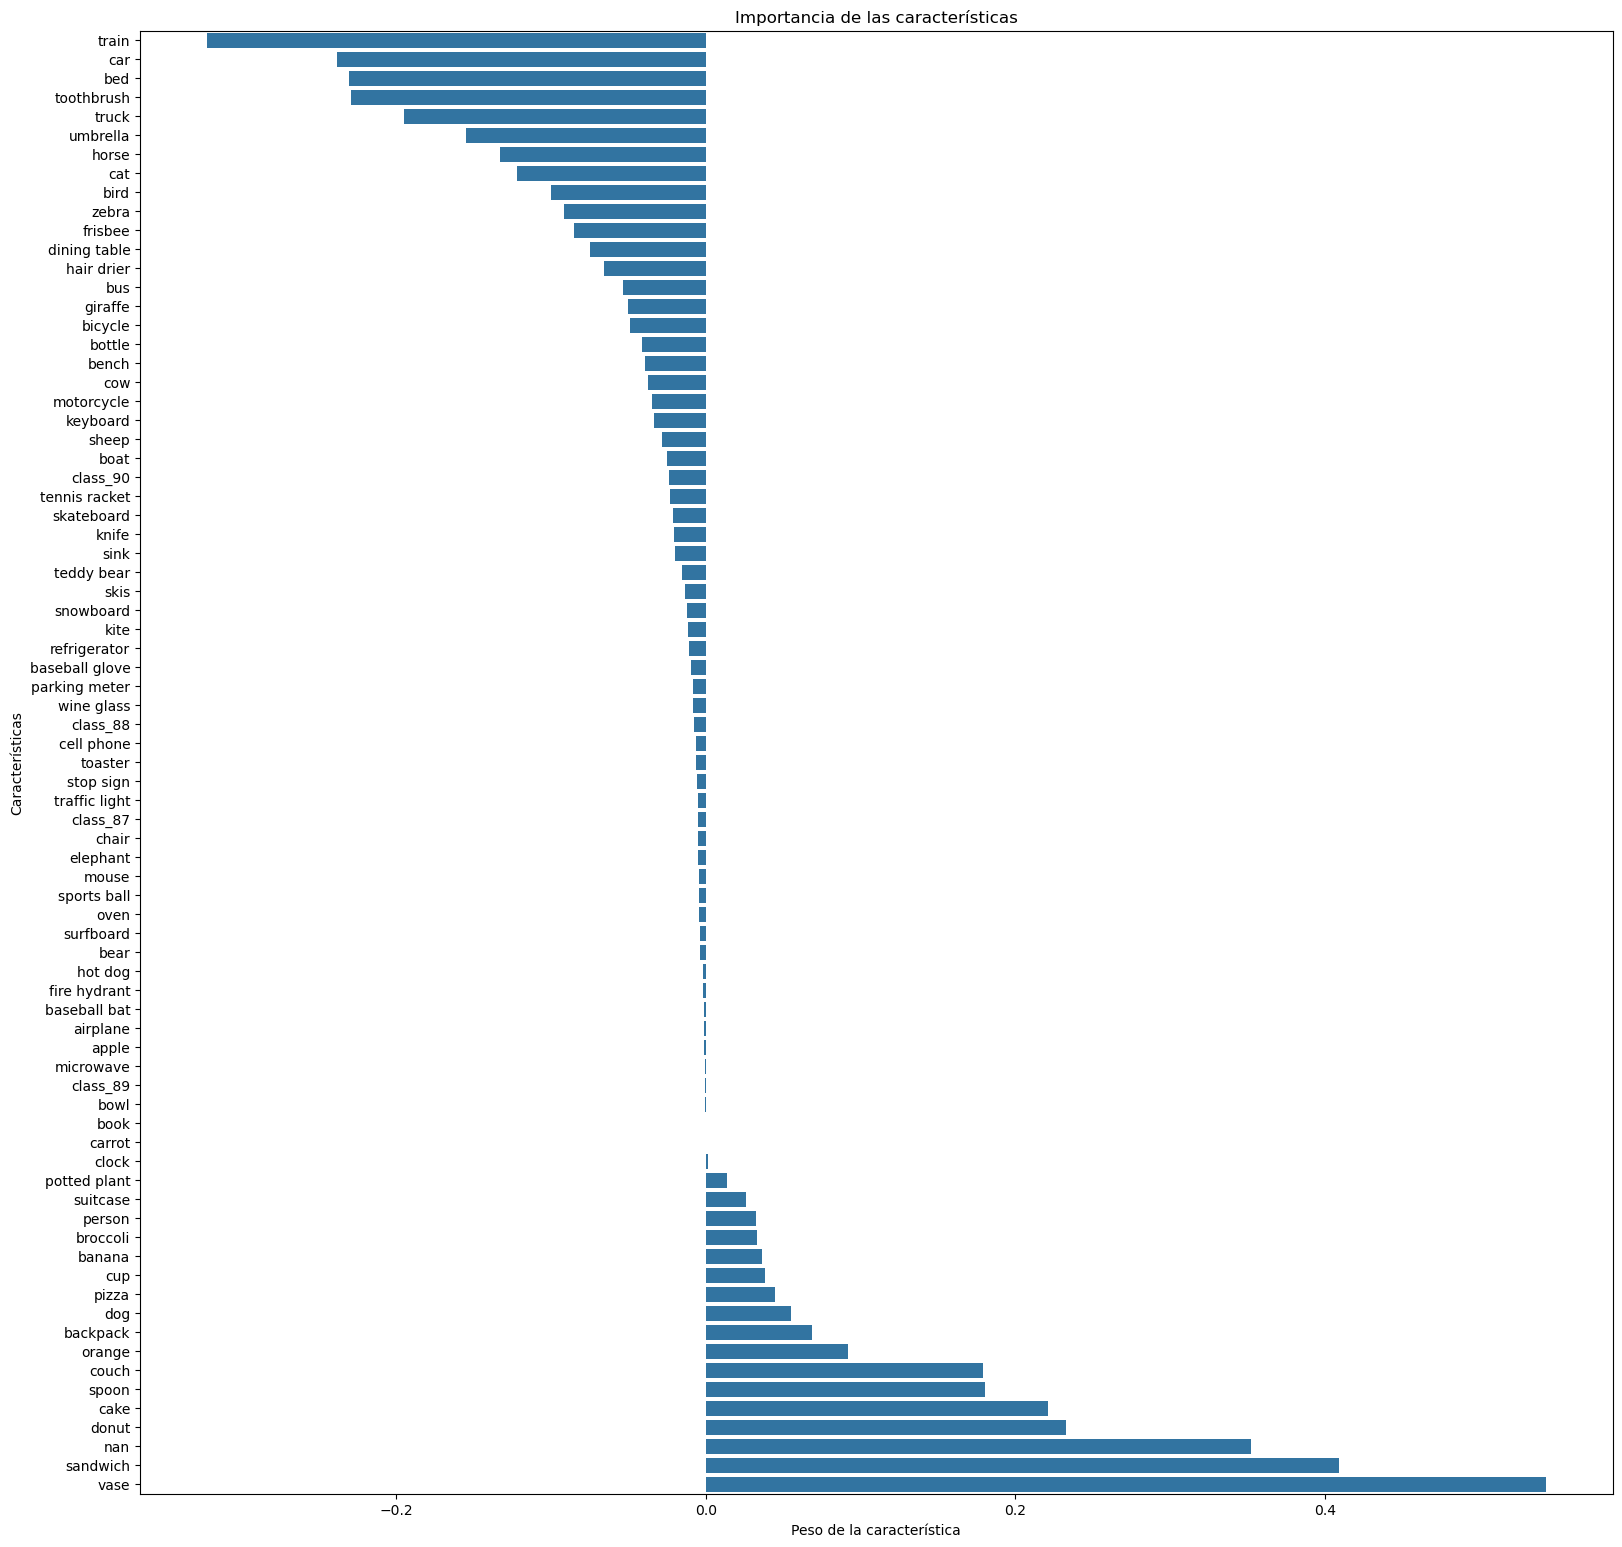

In [16]:
if hasattr(clf, 'coef_'):
    feature_importance = clf.coef_[0]
    feature_names = df.drop(columns=['category', 'video_name']).columns

    # Ordenamos por importancia
    sorted_idx = np.argsort(feature_importance)
    sorted_feature_importance = feature_importance[sorted_idx]
    sorted_feature_names = feature_names[sorted_idx]

    # Ploteamos
    plt.figure(figsize=(19, 19))
    
    sns.barplot(x=sorted_feature_importance, y=sorted_feature_names)
    plt.title("Importancia de las características")
    plt.xlabel("Peso de la característica")
    plt.ylabel("Características")
    
    plt.show()
    
else:
    print("El modelo no proporciona coeficientes.")